# prepare bike sharing dataset
download, preporcess, and generate splits

Data is at:
https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

## - dowload data

In [1]:
;pwd

/mnt/idms/home/jungadam/spring/experiment/data/base_datasets


In [2]:
url = "https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip"
run(`mkdir -p cache`)
run(`wget -P cache/ $url`)

--2025-10-07 13:39:52--  https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘cache/bike+sharing+dataset.zip.2’

     0K .......... .......... .......... .......... ..........  155K
    50K .......... .......... .......... .......... ..........  307K
   100K .......... .......... .......... .......... .......... 2.37M
   150K .......... .......... .......... .......... ..........  188M
   200K .......... .......... .......... .......... ..........  331K
   250K .......... .......... ...                               165M=0.7s

2025-10-07 13:39:54 (415 KB/s) - ‘cache/bike+sharing+dataset.zip.2’ saved [279992]



Process(`wget -P cache/ https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip`, ProcessExited(0))

In [3]:
run(`unzip -o cache/bike+sharing+dataset.zip -d cache`)

Archive:  cache/bike+sharing+dataset.zip
  inflating: cache/Readme.txt        
  inflating: cache/day.csv           
  inflating: cache/hour.csv          


Process(`unzip -o cache/bike+sharing+dataset.zip -d cache`, ProcessExited(0))

## - preprocess data

In [4]:
using MLJ, DataFrames, Plots, CSV, Random

In [5]:
df = CSV.read("cache/hour.csv", DataFrame)
first(df, 5)

5×17 DataFrame
 Row │ instant  dteday      season  yr     mnth   hr     holiday  weekday  wor ⋯
     │ Int64    Date        Int64   Int64  Int64  Int64  Int64    Int64    Int ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │       1  2011-01-01       1      0      1      0        0        6      ⋯
   2 │       2  2011-01-01       1      0      1      1        0        6
   3 │       3  2011-01-01       1      0      1      2        0        6
   4 │       4  2011-01-01       1      0      1      3        0        6
   5 │       5  2011-01-01       1      0      1      4        0        6      ⋯
                                                               9 columns omitted

In [6]:
select!(df, Not([:instant, :dteday, :casual, :registered]))
first(df, 5)

5×13 DataFrame
 Row │ season  yr     mnth   hr     holiday  weekday  workingday  weathersit   ⋯
     │ Int64   Int64  Int64  Int64  Int64    Int64    Int64       Int64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │      1      0      1      0        0        6           0           1   ⋯
   2 │      1      0      1      1        0        6           0           1
   3 │      1      0      1      2        0        6           0           1
   4 │      1      0      1      3        0        6           0           1
   5 │      1      0      1      4        0        6           0           1   ⋯
                                                               5 columns omitted

## - generate splits

In [7]:
Random.seed!(42)
run(`mkdir -p exported_splits`)
run(`mkdir -p exported_splits/bike`)
# Generate and save 20 random splits:
for i = 0:19
    # same split ratio as on the uci regression benchmark:
    # train, valid, test = .9 * 4/5, .9 * 1/5, .1
    train, valid, test = partition(df, .9 * 4/5, .9 * 1/5, shuffle = true) 
    
    # save to csv
    split_path = joinpath("exported_splits", "bike", "split_$i")
    run(`mkdir -p $split_path`)
    
    @info CSV.write(joinpath(split_path, "X_train.csv"), select(train, Not(:cnt)))
    @info CSV.write(joinpath(split_path, "X_validation.csv"), select(valid, Not(:cnt)))
    @info CSV.write(joinpath(split_path, "X_test.csv"), select(test, Not(:cnt)))
    @info CSV.write(joinpath(split_path, "y_train.csv"), select(train, :cnt))
    @info CSV.write(joinpath(split_path, "y_validation.csv"), select(valid, :cnt))
    @info CSV.write(joinpath(split_path, "y_test.csv"), select(test, :cnt))
end

[ Info: exported_splits/bike/split_0/X_train.csv
[ Info: exported_splits/bike/split_0/X_validation.csv
[ Info: exported_splits/bike/split_0/X_test.csv
[ Info: exported_splits/bike/split_0/y_train.csv
[ Info: exported_splits/bike/split_0/y_validation.csv
[ Info: exported_splits/bike/split_0/y_test.csv
[ Info: exported_splits/bike/split_1/X_train.csv
[ Info: exported_splits/bike/split_1/X_validation.csv
[ Info: exported_splits/bike/split_1/X_test.csv
[ Info: exported_splits/bike/split_1/y_train.csv
[ Info: exported_splits/bike/split_1/y_validation.csv
[ Info: exported_splits/bike/split_1/y_test.csv
[ Info: exported_splits/bike/split_2/X_train.csv
[ Info: exported_splits/bike/split_2/X_validation.csv
[ Info: exported_splits/bike/split_2/X_test.csv
[ Info: exported_splits/bike/split_2/y_train.csv
[ Info: exported_splits/bike/split_2/y_validation.csv
[ Info: exported_splits/bike/split_2/y_test.csv
[ Info: exported_splits/bike/split_3/X_train.csv
[ Info: exported_splits/bike/split_3/X_valida

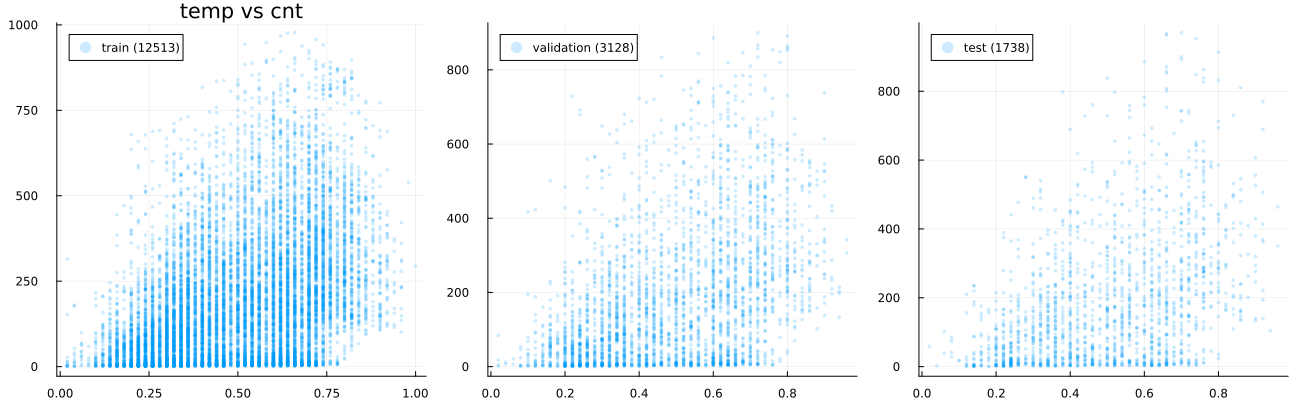

In [8]:
# plot first split
fn = "exported_splits/bike/split_0/"
X_train = CSV.read(fn * "X_train.csv", DataFrame).temp
y_train = CSV.read(fn * "y_train.csv", DataFrame).cnt
X_validation = CSV.read(fn * "X_validation.csv", DataFrame).temp
y_validation = CSV.read(fn * "y_validation.csv", DataFrame).cnt
X_test = CSV.read(fn * "X_test.csv", DataFrame).temp
y_test = CSV.read(fn * "y_test.csv", DataFrame).cnt

plot(
    scatter(X_train, y_train, lab = "train ($(length(y_train)))", title = "temp vs cnt"),
    scatter(X_validation, y_validation, lab = "validation ($(length(y_validation)))"),
    scatter(X_test, y_test, lab = "test ($(length(y_test)))"),
    layout = (1, 3), size = (1300, 400), ms = 2, markerstrokewidth = 0, markeralpha = .2
    )